In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
county = "Changhua_County"
path = f"../data/processed/{county}.csv"

try:
    df = pd.read_csv(path)
    df["date"] = pd.to_datetime(df["date"])
    df = df.set_index("date")
except FileNotFoundError:
    print("Can't find the county name.")

# Group by the sitename column and resample it by month to get the mean of pm2.5

In [3]:
pollutant = "pm2.5"
df_monthly = df.groupby("sitename").resample("ME")[pollutant].mean().reset_index()
df_monthly

,sitename,date,pm2.5
0,Changhua,2016-11-30,19.429907
1,Changhua,2016-12-31,28.810700
2,Changhua,2017-01-31,28.292181
3,Changhua,2017-02-28,28.087237
4,Changhua,2017-03-31,32.602289
...,...,...,...
394,Xianxi,2024-04-30,19.201681
395,Xianxi,2024-05-31,13.561983
396,Xianxi,2024-06-30,6.133992
397,Xianxi,2024-07-31,6.690736


# Extract the year and month data

In [4]:
df_monthly["year"] = df_monthly["date"].dt.year
df_monthly["month"] = df_monthly["date"].dt.month
df_monthly

,sitename,date,pm2.5,year,month
0,Changhua,2016-11-30,19.429907,2016,11
1,Changhua,2016-12-31,28.810700,2016,12
2,Changhua,2017-01-31,28.292181,2017,1
3,Changhua,2017-02-28,28.087237,2017,2
4,Changhua,2017-03-31,32.602289,2017,3
...,...,...,...,...,...
394,Xianxi,2024-04-30,19.201681,2024,4
395,Xianxi,2024-05-31,13.561983,2024,5
396,Xianxi,2024-06-30,6.133992,2024,6
397,Xianxi,2024-07-31,6.690736,2024,7


# Draw the heat map by month

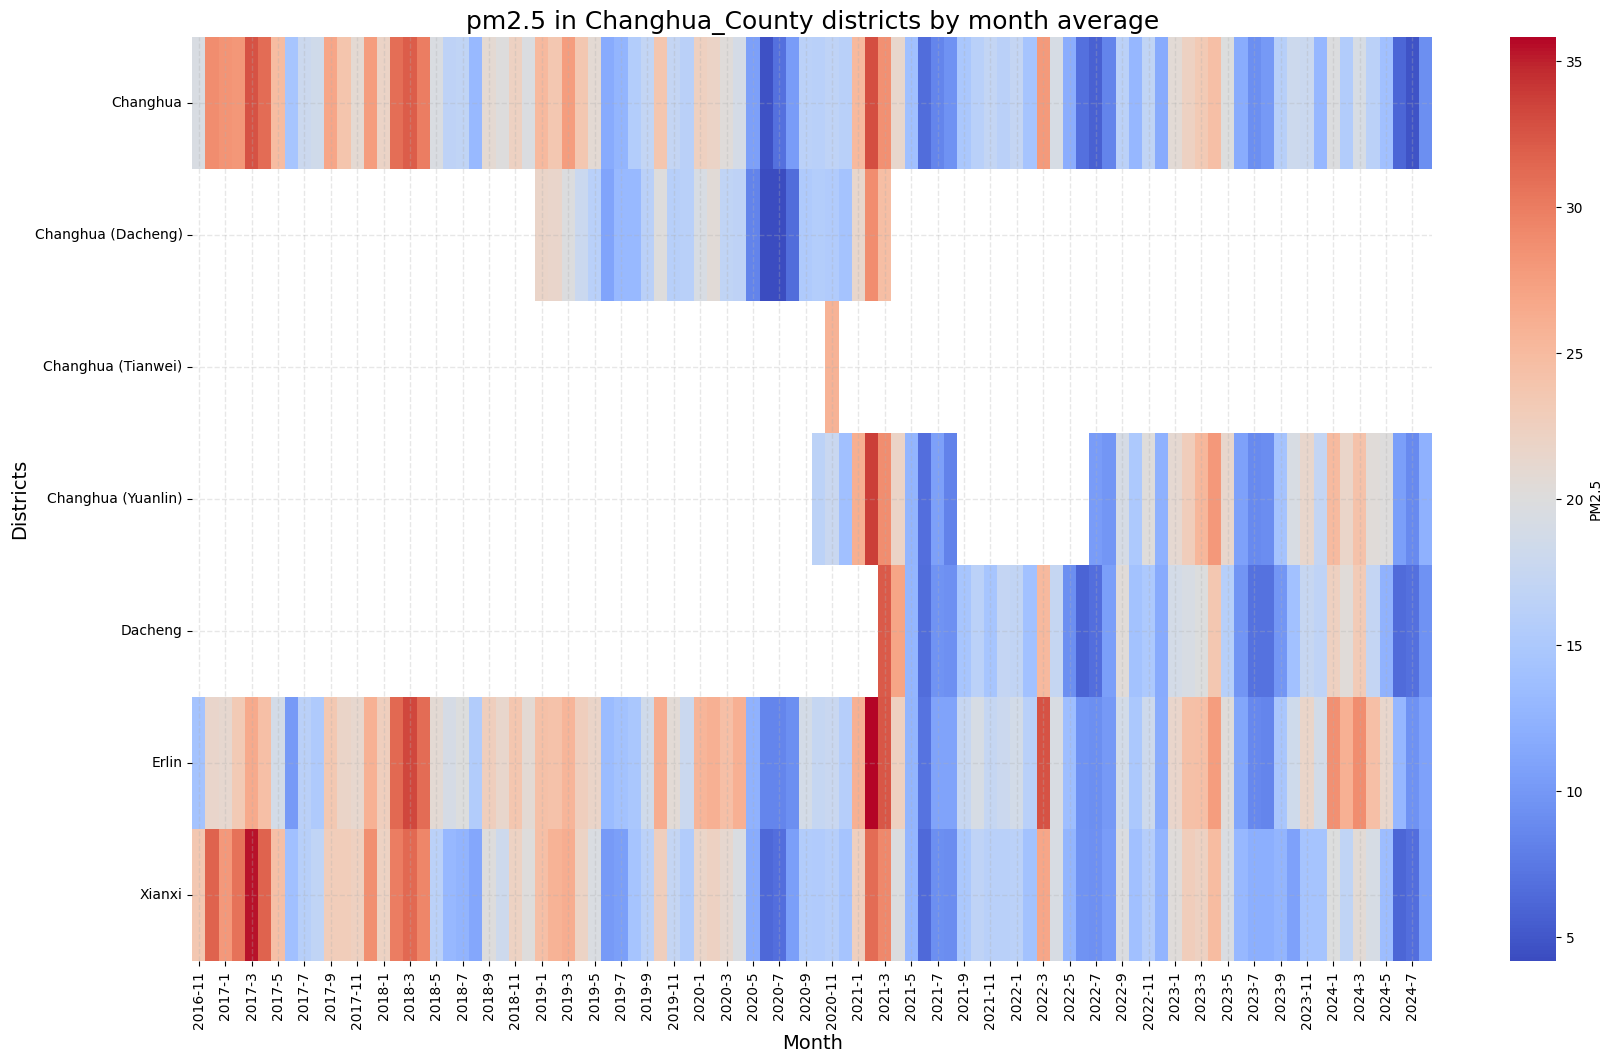

In [5]:
df_pivot = df_monthly.pivot_table(values=pollutant, index="sitename", columns=["year", "month"])

plt.figure(figsize=(20, 12))
sns.heatmap(data=df_pivot, cmap="coolwarm", cbar_kws={"label": "PM2.5"})
plt.title(f"{pollutant} in {county} districts by month average", fontsize=18)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Districts", fontsize=14)
plt.grid(linestyle="--", linewidth=1, alpha=0.3)

# save the figure
path = f"../figure/(HM){county}_{pollutant}_month.png"
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path, dpi=600, bbox_inches="tight")

plt.show()

# Group by the sitename column and resample it by year to get the mean of pm2.5

In [6]:
pollutant = "pm2.5"
df_yearly = df.groupby("sitename").resample("YE")[pollutant].mean().reset_index()

df_yearly["year"] = df_yearly["date"].dt.year
df_yearly

,sitename,date,pm2.5,year
0,Changhua,2016-12-31,27.610048,2016
1,Changhua,2017-12-31,24.793309,2017
2,Changhua,2018-12-31,22.023493,2018
3,Changhua,2019-12-31,19.685201,2019
4,Changhua,2020-12-31,15.035390,2020
5,Changhua,2021-12-31,18.999600,2021
6,Changhua,2022-12-31,14.161824,2022
7,Changhua,2023-12-31,17.135589,2023
8,Changhua,2024-12-31,13.105811,2024
9,Changhua (Dacheng),2019-12-31,16.792217,2019


# Draw the heat map by year

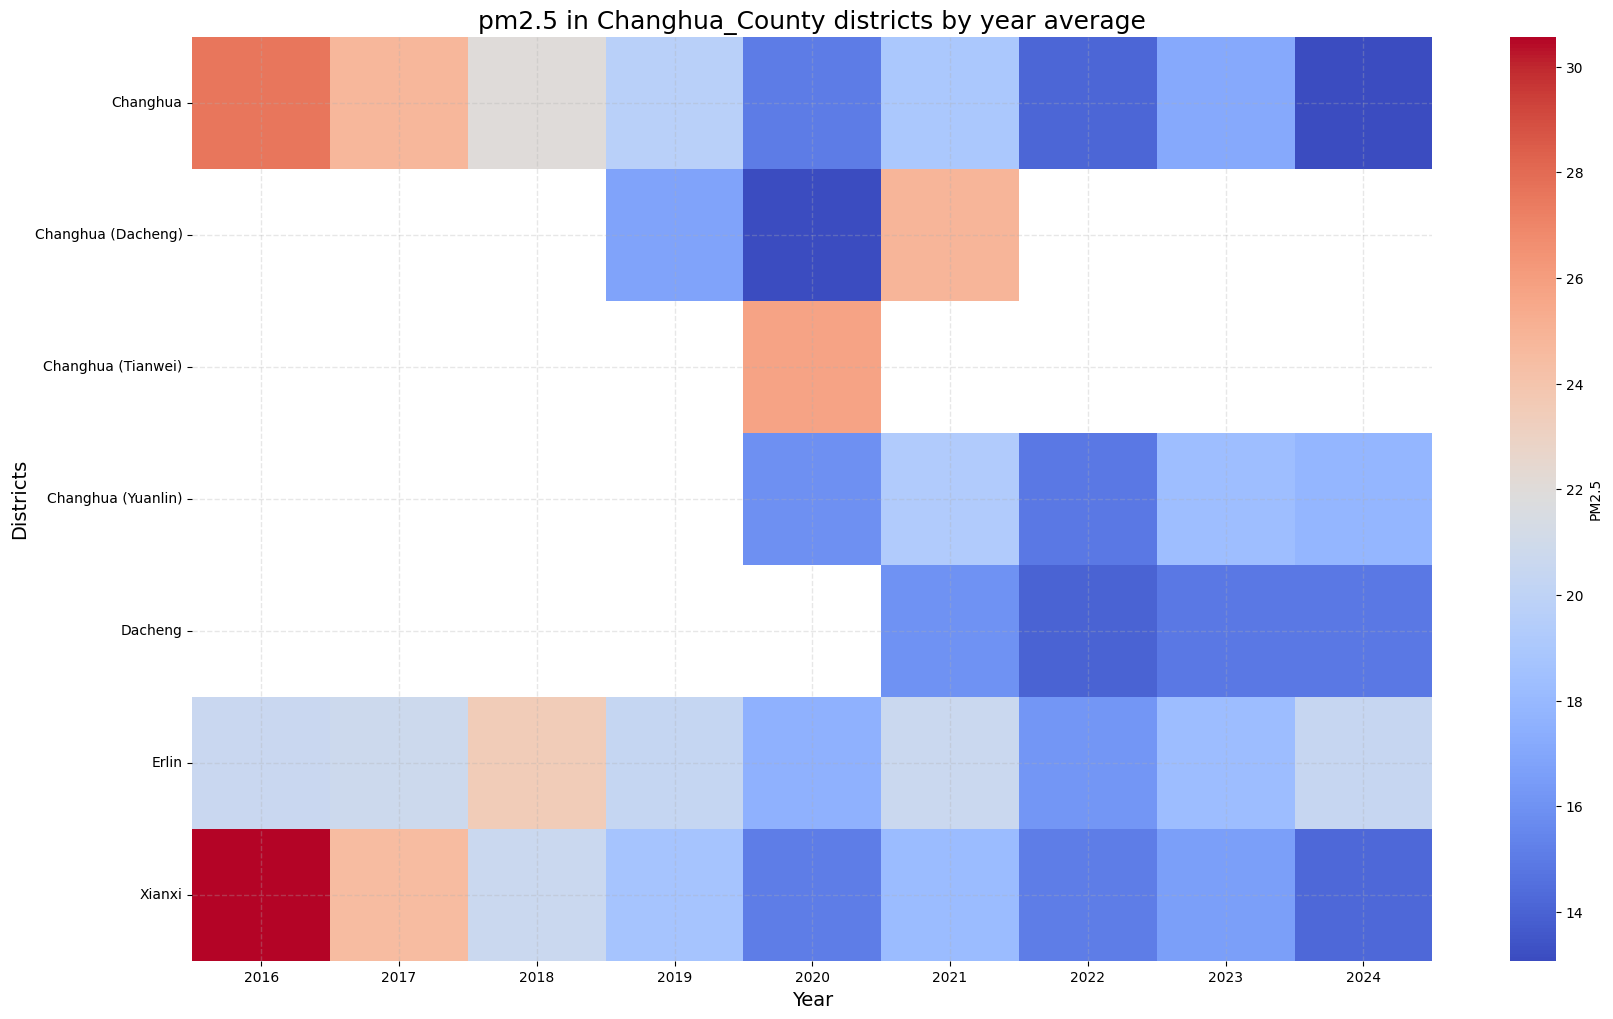

In [7]:
df_pivot = df_yearly.pivot_table(values=pollutant, index="sitename", columns=["year"])

plt.figure(figsize=(20, 12))
sns.heatmap(data=df_pivot, cmap="coolwarm", cbar_kws={"label": "PM2.5"})
plt.title(f"{pollutant} in {county} districts by year average", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Districts", fontsize=14)
plt.grid(linestyle="--", linewidth=1, alpha=0.3)

# save the figure
path = f"../figure/(HM){county}_{pollutant}_year.png"
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path, dpi=600, bbox_inches="tight")

plt.show()